# GHG HLM Data Prep

Importing full GHG_post_outliers data set and merging Scope_1_2_emissions_amount

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GroupShuffleSplit
from scipy.stats import zscore
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer
import warnings


#read in dataset GHG_post_outliers data set
df=pd.read_csv('/Users/amberjensen/Desktop/GHG_Emissions_Project/Data/GHG_Post_Outlier.csv')

In [2]:
#check for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44079 entries, 0 to 44078
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                44079 non-null  object 
 1   account_id                  44079 non-null  int64  
 2   Year                        44079 non-null  int64  
 3   incorporated_country        44079 non-null  object 
 4   Primary activity            44079 non-null  object 
 5   Primary sector              44079 non-null  object 
 6   Market_Cap_USD              37591 non-null  float64
 7   Third_party_verification    44055 non-null  object 
 8   Revenue_USD                 37799 non-null  float64
 9   ebitda_USD                  37799 non-null  float64
 10  grossProfit_USD             37799 non-null  float64
 11  netIncome_USD               37799 non-null  float64
 12  cashAndCashEquivalents_USD  37799 non-null  float64
 13  shortTermInvestments_USD    377

In [3]:
#read scope 1 and 2 data
df1=pd.read_csv('/Users/amberjensen/Desktop/GHG_Emissions_Project/Data/scope_1_2.csv')
df1.head()

,id,year,value
0,44,2013,406.350000
1,45,2013,19.000000
2,53,2013,143572.966667
3,55,2013,168147.000000
4,58,2013,58188.280000


In [4]:
df1.head()

#rename id to account_id
df1=df1.rename(columns={'id':'account_id'})

#rename value to scope1_2 and make lowercase
df1=df1.rename(columns={'value':'scope_1_2_emissions_amount'})

#rename year to uppercase
df1=df1.rename(columns={'year':'Year'})

df1.head()

,account_id,Year,scope_1_2_emissions_amount
0,44,2013,406.350000
1,45,2013,19.000000
2,53,2013,143572.966667
3,55,2013,168147.000000
4,58,2013,58188.280000


In [5]:
# merge with df
df = pd.merge(df, df1, how='left', on=['account_id', 'Year'])
df.head()

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,country_ghg_avg,country_population_avg,country_gdp_avg,scope_1_2_emissions_amount
0,3i Group,44,2018,United Kingdom,Asset managers,Financial services,9.548124e+09,Third-party verification or assurance process ...,1.728470e+09,1.565910e+09,...,1.031240e+09,8.544560e+09,730250000.0,1.004443e+10,Purchased goods and services,17.62,428.766726,6.734692e+07,3.038320e+12,338.95
1,3i Group,44,2018,United Kingdom,Asset managers,Financial services,9.548124e+09,Third-party verification or assurance process ...,1.728470e+09,1.565910e+09,...,1.031240e+09,8.544560e+09,730250000.0,1.004443e+10,Fuel-and-energy-related activities (not includ...,61.42,428.766726,6.734692e+07,3.038320e+12,338.95
2,3i Group,44,2018,United Kingdom,Asset managers,Financial services,9.548124e+09,Third-party verification or assurance process ...,1.728470e+09,1.565910e+09,...,1.031240e+09,8.544560e+09,730250000.0,1.004443e+10,Waste generated in operations,57.21,428.766726,6.734692e+07,3.038320e+12,338.95
3,3i Group,44,2018,United Kingdom,Asset managers,Financial services,9.548124e+09,Third-party verification or assurance process ...,1.728470e+09,1.565910e+09,...,1.031240e+09,8.544560e+09,730250000.0,1.004443e+10,Business travel,2549.33,428.766726,6.734692e+07,3.038320e+12,338.95
4,3i Group,44,2018,United Kingdom,Asset managers,Financial services,9.548124e+09,Third-party verification or assurance process ...,1.728470e+09,1.565910e+09,...,1.031240e+09,8.544560e+09,730250000.0,1.004443e+10,Employee commuting,3.90,428.766726,6.734692e+07,3.038320e+12,338.95


In [6]:
#check for duplicates
df.duplicated().sum()

61

In [7]:
#remove duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44018 entries, 0 to 44078
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                44018 non-null  object 
 1   account_id                  44018 non-null  int64  
 2   Year                        44018 non-null  int64  
 3   incorporated_country        44018 non-null  object 
 4   Primary activity            44018 non-null  object 
 5   Primary sector              44018 non-null  object 
 6   Market_Cap_USD              37530 non-null  float64
 7   Third_party_verification    43994 non-null  object 
 8   Revenue_USD                 37738 non-null  float64
 9   ebitda_USD                  37738 non-null  float64
 10  grossProfit_USD             37738 non-null  float64
 11  netIncome_USD               37738 non-null  float64
 12  cashAndCashEquivalents_USD  37738 non-null  float64
 13  shortTermInvestments_USD    37738 no

In [8]:
# Add quadratic term

df['Year_sq'] = df['Year'] ** 2

In [9]:
#look at columns
df.columns

Index(['account_name', 'account_id', 'Year', 'incorporated_country',
       'Primary activity', 'Primary sector', 'Market_Cap_USD',
       'Third_party_verification', 'Revenue_USD', 'ebitda_USD',
       'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD',
       'shortTermInvestments_USD', 'longTermInvestments_USD',
       'totalAssets_USD', 'totalLiabilities_USD', 'totalInvestments_USD',
       'totalDebt_USD', 'totalEquity_USD', 'Scope_3_emissions_type',
       'Scope_3_emissions_amount', 'country_ghg_avg', 'country_population_avg',
       'country_gdp_avg', 'scope_1_2_emissions_amount', 'Year_sq'],
      dtype='object')

In [10]:
#exclude 'country_ghg_avg', 'country_population_avg' and 'country_gdp_avg' to focus on company level
df=df.drop(columns=['country_ghg_avg', 'country_population_avg', 'country_gdp_avg'])

In [11]:
#define a list of numeric columns
numeric_cols = ['Market_Cap_USD', 'Revenue_USD', 'ebitda_USD',
       'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD',
       'shortTermInvestments_USD', 'longTermInvestments_USD',
       'totalAssets_USD', 'totalLiabilities_USD', 'totalInvestments_USD',
       'totalDebt_USD', 'totalEquity_USD', 'Scope_3_emissions_amount', 'scope_1_2_emissions_amount']

In [12]:
# account id
df['account_id'].value_counts()
#account id unique
df['account_id'].nunique()

1108

In [13]:
#look at scope 3 emissions type
df['Scope_3_emissions_type'].value_counts()

Scope_3_emissions_type
Business travel                                                      6066
Purchased goods and services                                         5166
Waste generated in operations                                        4810
Fuel-and-energy-related activities (not included in Scope 1 or 2)    4704
Employee commuting                                                   4662
Upstream transportation and distribution                             3920
Capital goods                                                        3168
Downstream transportation and distribution                           2481
Use of sold products                                                 2253
End of life treatment of sold products                               2201
Upstream leased assets                                               1172
Downstream leased assets                                             1129
Investments                                                           905
Processing of s

In [14]:
#remove 0 values from Scope_3_emissions_amount
df=df[df['Scope_3_emissions_amount']!=0]

In [15]:
df.isna().sum()

account_name                     0
account_id                       0
Year                             0
incorporated_country             0
Primary activity                 0
Primary sector                   0
Market_Cap_USD                6488
Third_party_verification        24
Revenue_USD                   6280
ebitda_USD                    6280
grossProfit_USD               6280
netIncome_USD                 6280
cashAndCashEquivalents_USD    6280
shortTermInvestments_USD      6280
longTermInvestments_USD       6280
totalAssets_USD               6280
totalLiabilities_USD          6280
totalInvestments_USD          6280
totalDebt_USD                 6280
totalEquity_USD               6280
Scope_3_emissions_type           0
Scope_3_emissions_amount         0
scope_1_2_emissions_amount      93
Year_sq                          0
dtype: int64

In [16]:
# Looking at zeros in the dataset
(df == 0).sum()

account_name                     0
account_id                       0
Year                             0
incorporated_country             0
Primary activity                 0
Primary sector                   0
Market_Cap_USD                   0
Third_party_verification         0
Revenue_USD                      0
ebitda_USD                       0
grossProfit_USD                  8
netIncome_USD                   16
cashAndCashEquivalents_USD      20
shortTermInvestments_USD      8671
longTermInvestments_USD       1348
totalAssets_USD                 11
totalLiabilities_USD            20
totalInvestments_USD           619
totalDebt_USD                  218
totalEquity_USD                  0
Scope_3_emissions_type           0
Scope_3_emissions_amount         0
scope_1_2_emissions_amount      13
Year_sq                          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44018 entries, 0 to 44078
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                44018 non-null  object 
 1   account_id                  44018 non-null  int64  
 2   Year                        44018 non-null  int64  
 3   incorporated_country        44018 non-null  object 
 4   Primary activity            44018 non-null  object 
 5   Primary sector              44018 non-null  object 
 6   Market_Cap_USD              37530 non-null  float64
 7   Third_party_verification    43994 non-null  object 
 8   Revenue_USD                 37738 non-null  float64
 9   ebitda_USD                  37738 non-null  float64
 10  grossProfit_USD             37738 non-null  float64
 11  netIncome_USD               37738 non-null  float64
 12  cashAndCashEquivalents_USD  37738 non-null  float64
 13  shortTermInvestments_USD    37738 no

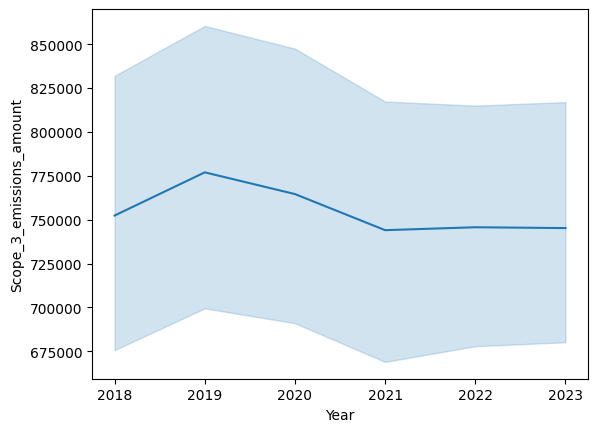

In [18]:
#plot a line plot of Scope_3_emissions_amount vs Year
sns.lineplot(x='Year', y='Scope_3_emissions_amount', data=df)
plt.show()

<Axes: xlabel='Year', ylabel='scope_1_2_emissions_amount'>

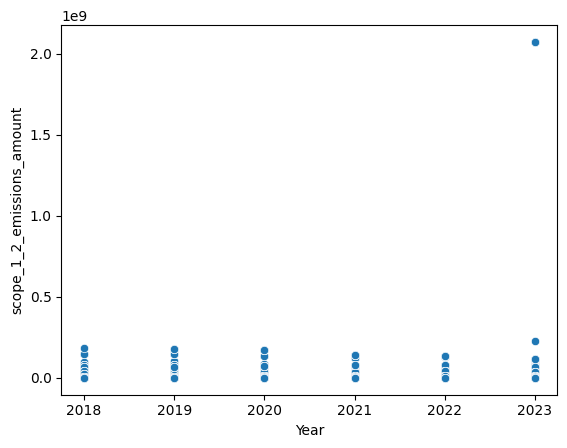

In [19]:
#plot a scatter plot of scope year emissions and scope 1_2 emissions

sns.scatterplot(x='Year', y='scope_1_2_emissions_amount', data=df)

In [20]:
df_sorted=df.sort_values(by='scope_1_2_emissions_amount', ascending=False).reset_index(drop=True)

#display sorted df
df_sorted.head(20)

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,scope_1_2_emissions_amount,Year_sq
0,ConvaTec,36028,2023,United Kingdom,Health care supplies,Medical equipment & supplies,6.284455e+09,No third-party verification or assurance,2.194016e+09,5.127631e+08,...,3.984366e+07,3.708456e+09,2.018146e+09,3.984366e+07,1.310547e+09,1.690310e+09,Fuel-and-energy-related activities (not includ...,8.214000e+03,2.072500e+09,4092529
1,ConvaTec,36028,2023,United Kingdom,Health care supplies,Medical equipment & supplies,6.284455e+09,No third-party verification or assurance,2.194016e+09,5.127631e+08,...,3.984366e+07,3.708456e+09,2.018146e+09,3.984366e+07,1.310547e+09,1.690310e+09,End of life treatment of sold products,4.002000e+04,2.072500e+09,4092529
2,ConvaTec,36028,2023,United Kingdom,Health care supplies,Medical equipment & supplies,6.284455e+09,No third-party verification or assurance,2.194016e+09,5.127631e+08,...,3.984366e+07,3.708456e+09,2.018146e+09,3.984366e+07,1.310547e+09,1.690310e+09,Employee commuting,3.352000e+03,2.072500e+09,4092529
3,ConvaTec,36028,2023,United Kingdom,Health care supplies,Medical equipment & supplies,6.284455e+09,No third-party verification or assurance,2.194016e+09,5.127631e+08,...,3.984366e+07,3.708456e+09,2.018146e+09,3.984366e+07,1.310547e+09,1.690310e+09,Business travel,2.328000e+03,2.072500e+09,4092529
4,ConvaTec,36028,2023,United Kingdom,Health care supplies,Medical equipment & supplies,6.284455e+09,No third-party verification or assurance,2.194016e+09,5.127631e+08,...,3.984366e+07,3.708456e+09,2.018146e+09,3.984366e+07,1.310547e+09,1.690310e+09,Waste generated in operations,3.055000e+03,2.072500e+09,4092529
5,ConvaTec,36028,2023,United Kingdom,Health care supplies,Medical equipment & supplies,6.284455e+09,No third-party verification or assurance,2.194016e+09,5.127631e+08,...,3.984366e+07,3.708456e+09,2.018146e+09,3.984366e+07,1.310547e+09,1.690310e+09,Capital goods,5.130100e+04,2.072500e+09,4092529
6,ConvaTec,36028,2023,United Kingdom,Health care supplies,Medical equipment & supplies,6.284455e+09,No third-party verification or assurance,2.194016e+09,5.127631e+08,...,3.984366e+07,3.708456e+09,2.018146e+09,3.984366e+07,1.310547e+09,1.690310e+09,Purchased goods and services,2.954820e+05,2.072500e+09,4092529
7,THOMAS GREG & SONS GRAFICA E SERV E,29524,2023,Brazil,Printing services,Print & publishing services,NaN,Third-party verification or assurance process ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Business travel,1.165590e+02,2.297903e+08,4092529
8,ArcelorMittal,904,2018,Luxembourg,Iron & steel,"Metal smelting, refining & forming",1.839396e+10,Third-party verification or assurance process ...,7.603300e+10,5.596000e+09,...,4.906000e+09,9.124900e+10,4.714100e+10,5.761000e+09,1.248300e+10,4.410800e+10,Purchased goods and services,1.373950e+07,1.824269e+08,4072324
9,ArcelorMittal,904,2019,Luxembourg,Iron & steel,"Metal smelting, refining & forming",1.580938e+10,Third-party verification or assurance process ...,7.061500e+10,3.669000e+09,...,6.529000e+09,8.790800e+10,4.742500e+10,6.529000e+09,1.434000e+10,4.048300e+10,Purchased goods and services,1.479119e+07,1.772362e+08,4076361


In [21]:
#remove account id=36028

df=df[df['account_id']!=36028]

<Axes: xlabel='Year', ylabel='scope_1_2_emissions_amount'>

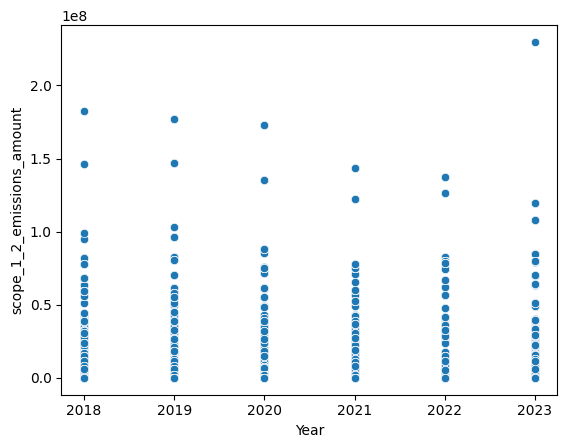

In [22]:
#rerun the plot
sns.scatterplot(x='Year', y='scope_1_2_emissions_amount', data=df)

<Axes: xlabel='scope_1_2_emissions_amount', ylabel='Scope_3_emissions_amount'>

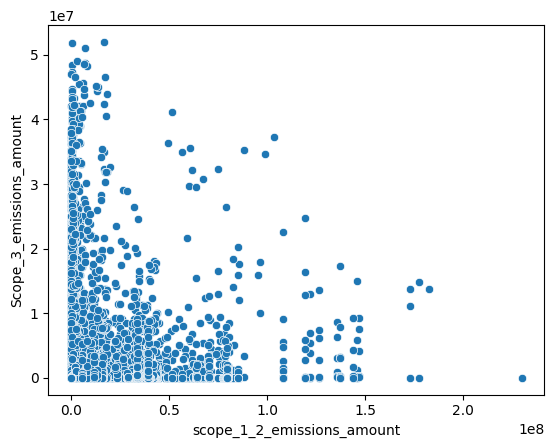

In [23]:
#plot a scatter plot between scope 1 and scope 2 emissions and scope 3

sns.scatterplot(x='scope_1_2_emissions_amount', y='Scope_3_emissions_amount', data=df)

In [32]:
# Statistics Summary table
numeric_cols = ['account_id', 'Market_Cap_USD', 'Revenue_USD', 'ebitda_USD',
       'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD',
       'shortTermInvestments_USD', 'longTermInvestments_USD',
       'totalAssets_USD', 'totalLiabilities_USD', 'totalInvestments_USD',
       'totalDebt_USD', 'totalEquity_USD', 'Scope_3_emissions_amount', 'scope_1_2_emissions_amount']
cat_cols = ['incorporated_country', 'Primary activity', 'Primary sector']

# Summary statistics for numeric columns
numeric_summary = df[numeric_cols].describe().T

# Summary statistics for categorical columns
cat_summary = df[cat_cols].describe().T

# Print to markdown (for review)
print(numeric_summary.to_markdown())
print(cat_summary.to_markdown())

# Export to CSV
numeric_summary.to_csv("numeric_summary.csv", index=True)
cat_summary.to_csv("cat_summary.csv", index=True)

|                            |   count |             mean |             std |          min |             25% |              50% |              75% |              max |
|:---------------------------|--------:|-----------------:|----------------:|-------------:|----------------:|-----------------:|-----------------:|-----------------:|
| account_id                 |   44001 |  18495.5         | 29243.4         | 44           |  7374           |  14709           |  21641           | 832061           |
| Market_Cap_USD             |   37513 |      4.20874e+10 |     2.2827e+11  |  2.44914e+06 |     2.86136e+09 |      8.11857e+09 |      2.54085e+10 |      6.28303e+12 |
| Revenue_USD                |   37721 |      1.5495e+10  |     2.67489e+10 | -1.71137e+10 |     2.99379e+09 |      7.51609e+09 |      1.7098e+10  |      3.94328e+11 |
| ebitda_USD                 |   37721 |      3.16177e+09 |     7.36867e+09 | -9.2894e+10  |     4.15361e+08 |      1.139e+09   |      2.9432e+09  |      1.3054

|                            |   count |             mean |             std |          min |             25% |              50% |              75% |              max |
|:---------------------------|--------:|-----------------:|----------------:|-------------:|----------------:|-----------------:|-----------------:|-----------------:|
| account_id                 |   44001 |  18495.5         | 29243.4         | 44           |  7374           |  14709           |  21641           | 832061           |
| Market_Cap_USD             |   37513 |      4.20874e+10 |     2.2827e+11  |  2.44914e+06 |     2.86136e+09 |      8.11857e+09 |      2.54085e+10 |      6.28303e+12 |
| Revenue_USD                |   37721 |      1.5495e+10  |     2.67489e+10 | -1.71137e+10 |     2.99379e+09 |      7.51609e+09 |      1.7098e+10  |      3.94328e+11 |
| ebitda_USD                 |   37721 |      3.16177e+09 |     7.36867e+09 | -9.2894e+10  |     4.15361e+08 |      1.139e+09   |      2.9432e+09  |      1.30541e+11 |
| grossProfit_USD            |   37721 |      7.14681e+09 |     1.45684e+10 | -2.69926e+10 |     9.27424e+08 |      2.3796e+09  |      6.40116e+09 |      1.74062e+11 |
| netIncome_USD              |   37721 |      1.51476e+09 |     4.85186e+09 | -1.68059e+10 |     1.19515e+08 |      4.48752e+08 |      1.2902e+09  |      9.9803e+10  |
| cashAndCashEquivalents_USD |   37721 |      6.25088e+09 |     3.18171e+10 | -9.7362e+09  |     3.57745e+08 |      9.49177e+08 |      2.5838e+09  |      7.40834e+11 |
| shortTermInvestments_USD   |   37721 |      3.95435e+09 |     3.13019e+10 | -1.41453e+12 |     0           |      1.41156e+07 |      2.66635e+08 |      4.50581e+11 |
| longTermInvestments_USD    |   37721 |      1.37179e+10 |     6.83259e+10 | -1.6268e+10  |     5.69e+07    |      4.00672e+08 |      1.94217e+09 |      1.22971e+12 |
| totalAssets_USD            |   37721 |      6.56204e+10 |     2.24286e+11 |  0           |     5.15511e+09 |      1.2833e+10  |      3.5574e+10  |      3.87539e+12 |
| totalLiabilities_USD       |   37721 |      4.92678e+10 |     1.9699e+11  |  0           |     2.60894e+09 |      7.34974e+09 |      2.1985e+10  |      3.54752e+12 |
| totalInvestments_USD       |   37721 |      1.6502e+10  |     8.16756e+10 | -1.1878e+10  |     8.98e+07    |      4.8764e+08  |      2.15784e+09 |      1.52888e+12 |
| totalDebt_USD              |   37721 |      1.20616e+10 |     3.44196e+10 |  0           |     9.664e+08   |      3.25374e+09 |      9.41754e+09 |      7.75677e+11 |
| totalEquity_USD            |   37721 |      1.13965e+10 |     2.27413e+10 | -1.0739e+10  |     1.83142e+09 |      4.47776e+09 |      1.11243e+10 |      3.27878e+11 |
| Scope_3_emissions_amount   |   44001 | 754259           |     3.3047e+06  |  0.002       |  2306           |  18767           | 158702           |      5.1998e+07  |
| scope_1_2_emissions_amount |   43908 |      2.4766e+06  |     9.56935e+06 |  0           | 34851.8         | 180673           | 829544           |      2.2979e+08  |


|                      |   count |   unique | top                |   freq |
|:---------------------|--------:|---------:|:-------------------|-------:|
| incorporated_country |   44001 |       42 | Japan              |  10081 |
| Primary activity     |   44001 |      133 | Banks              |   2755 |
| Primary sector       |   44001 |       57 | Financial services |   5476 |

In [25]:
#create dfs by Scope_3_emissions_type
business_travel=df[df['Scope_3_emissions_type']=='Business travel']
purchased_goods=df[df['Scope_3_emissions_type']=='Purchased goods and services']
waste=df[df['Scope_3_emissions_type']=='Waste generated in operations']
fuel_energy=df[df['Scope_3_emissions_type']=='Fuel-and-energy-related activities (not included in Scope 1 or 2)']
employee_commuting=df[df['Scope_3_emissions_type']=='Employee commuting']
upstream_transport=df[df['Scope_3_emissions_type']=='Upstream transportation and distribution']
capital=df[df['Scope_3_emissions_type']=='Capital goods']
downstream=df[df['Scope_3_emissions_type']=='Downstream transportation and distribution']
use_sold_products=df[df['Scope_3_emissions_type']=='Use of sold products']
end_of_life=df[df['Scope_3_emissions_type']=='End of life treatment of sold products']
upstream_leased_assets=df[df['Scope_3_emissions_type']=='Upstream leased assets']
downstream_leased_assets=df[df['Scope_3_emissions_type']=='Downstream leased assets']
investments=df[df['Scope_3_emissions_type']=='Investments']
processing_of_sold_products=df[df['Scope_3_emissions_type']=='Processing of sold products']
franchises=df[df['Scope_3_emissions_type']=='Franchises']
other_upstream=df[df['Scope_3_emissions_type']=='Other (upstream)']
other_downstream=df[df['Scope_3_emissions_type']=='Other (downstream)']

In [26]:
dfs = {
    "business_travel": df[df['Scope_3_emissions_type'] == 'Business travel'],
    "purchased_goods_and_services": df[df['Scope_3_emissions_type'] == 'Purchased goods and services'],
    "waste": df[df['Scope_3_emissions_type'] == 'Waste generated in operations'],
    "fuel_energy": df[df['Scope_3_emissions_type'] == 'Fuel-and-energy-related activities (not included in Scope 1 or 2)'],
    "employee_commuting": df[df['Scope_3_emissions_type'] == 'Employee commuting'],
    "upstream_transport": df[df['Scope_3_emissions_type'] == 'Upstream transportation and distribution'],
    "capital_goods": df[df['Scope_3_emissions_type'] == 'Capital goods'],
    "downstream": df[df['Scope_3_emissions_type'] == 'Downstream transportation and distribution'],
    "use_sold_products": df[df['Scope_3_emissions_type'] == 'Use of sold products'],
    "end_of_life": df[df['Scope_3_emissions_type'] == 'End of life treatment of sold products'],
    "upstream_leased_assets": df[df['Scope_3_emissions_type'] == 'Upstream leased assets'],
    "downstream_leased_assets": df[df['Scope_3_emissions_type'] == 'Downstream leased assets'],
    "investments": df[df['Scope_3_emissions_type'] == 'Investments'],
    "processing_of_sold_products": df[df['Scope_3_emissions_type'] == 'Processing of sold products'],
    "franchises": df[df['Scope_3_emissions_type'] == 'Franchises'],
    "other_upstream": df[df['Scope_3_emissions_type'] == 'Other (upstream)'],
    "other_downstream": df[df['Scope_3_emissions_type'] == 'Other (downstream)'],
}

# Export each DataFrame to a CSV file
for name, dataframe in dfs.items():
    dataframe.to_csv(f"{name}.csv", index=False)

In [27]:
df['Scope_3_emissions_type'].value_counts()

Scope_3_emissions_type
Business travel                                                      6060
Purchased goods and services                                         5162
Waste generated in operations                                        4809
Fuel-and-energy-related activities (not included in Scope 1 or 2)    4703
Employee commuting                                                   4661
Upstream transportation and distribution                             3920
Capital goods                                                        3165
Downstream transportation and distribution                           2481
Use of sold products                                                 2253
End of life treatment of sold products                               2200
Upstream leased assets                                               1172
Downstream leased assets                                             1129
Investments                                                           905
Processing of s